<a href="https://colab.research.google.com/github/luwigidapo/LabActivities/blob/main/Lab2_Titanic_Dapo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Question 1: Steps in Cleaning the Dataset & Algorithm Choice**

Loaded the dataset (train.csv)

In [1]:
import pandas as pd

df = pd.read_csv("/content/train - train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Checked Data Structure

In [20]:
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  891 non-null    int64   
 1   survived     891 non-null    category
 2   pclass       891 non-null    category
 3   name         891 non-null    object  
 4   sex          891 non-null    object  
 5   age          891 non-null    float64 
 6   sibsp        891 non-null    int64   
 7   parch        891 non-null    int64   
 8   ticket       891 non-null    object  
 9   fare         891 non-null    float64 
 10  embarked     891 non-null    object  
dtypes: category(2), float64(2), int64(3), object(4)
memory usage: 64.8+ KB


Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

# Identified Missing Values

In [2]:
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Handled Missing Values:
Filled Age with the median (28.0), as it is numerical and skewed.

In [ ]:
age_col = next((col for col in df.columns if "age" in col.lower()), None)
if age_col:
    df[age_col].fillna(df[age_col].median(), inplace=True)
else:
    print("No column found containing 'age'.")

Dropped Cabin (too many missing values).

In [15]:

df.columns = df.columns.str.lower().str.strip()


if "cabin" in df.columns:
    df.drop(columns=["cabin"], inplace=True)
else:
    print("Column 'cabin' not found. Skipping drop operation.")


Filled Embarked with the most common value ('S').

In [ ]:
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

# Removed Duplicate Entries

In [3]:
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


# Converted Categorical Columns to Proper Types

In [10]:
df["survived"] = df["survived"].astype("category")
df["pclass"] = df["pclass"].astype("category")


# Standardized Column Names to Lowercase

In [8]:
df.columns = df.columns.str.lower()


# Saved the Cleaned Dataset

In [7]:
df.to_csv("titanic_cleaned.csv", index=False)


# **Question 2: Data Analysis & **Insights**

# Survival Rate by Gender

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64


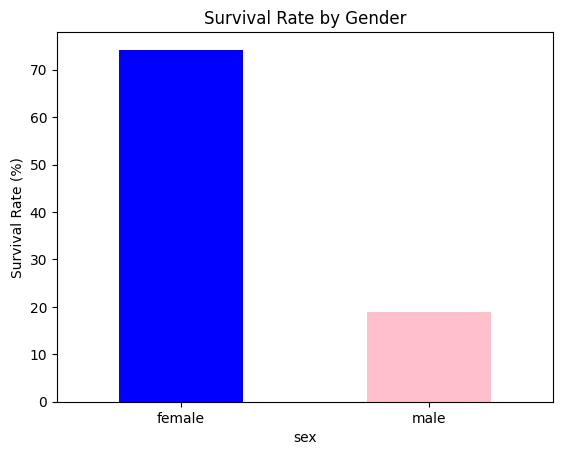

In [5]:

df.columns = df.columns.str.lower().str.strip()


survival_by_gender = df.groupby("sex")["survived"].mean() * 100
print(survival_by_gender)


import matplotlib.pyplot as plt
survival_by_gender.plot(kind="bar", color=["blue", "pink"])
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate (%)")
plt.xticks(rotation=0)
plt.show()


My insight is that women had a significantly higher survival rate due to the "Women and children first" policy.

# 2. Survival Rate by Passenger Class

pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


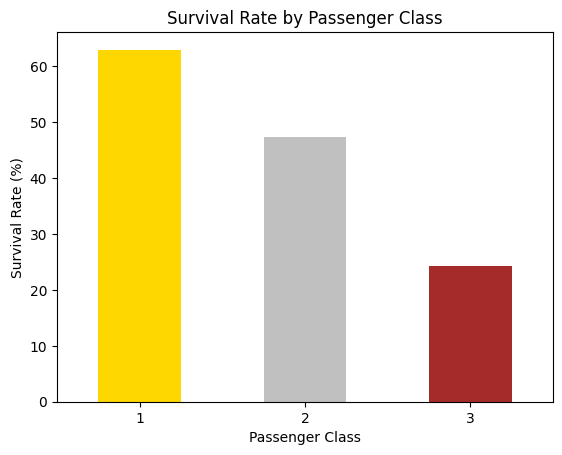

In [6]:
survival_by_class = df.groupby("pclass")["survived"].mean() * 100
print(survival_by_class)

# Visualization
survival_by_class.plot(kind="bar", color=["gold", "silver", "brown"])
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.xticks(rotation=0)
plt.show()


Wealthier passengers had a much higher chance of survival.